# Recommendation Systems Project

## Objective:

To create a recommender system that can recommend at least 5 new products to a user based on their behavior

## Domain:
E-Commerce

## Context:
Everyday a million products are being recommended to users based on
popularity and other metrics on e-commerce websites. The most popular e-commerce
website boosts average order value by 50%, increases revenues by 300%, and
improves conversion. In addition to being a powerful tool for increasing revenues,
product recommendations are so essential that customers now expect to see similar
features on all other eCommerce sites



### Import Libraries & load dataset

In [285]:
import pandas as pd                    # for data analysis & manipulation
import numpy as np                     # array handling
import matplotlib.pyplot as plt        # visualization library
%matplotlib inline
import seaborn as sns                  # visualization library

In [286]:
#Read dataset into a pandas dataframe
df = pd.read_csv('C:\\Users\\Srikanta\\Desktop\\Great Learning\\Python Files\\Week 24 Recommendation Systems Project\\ratings_Electronics.csv',header=None)

#Change the column names to meaningful ones
df.columns = ['userId','productId','ratings','timestamp']

#Check if the dataset is loaded into a dataframe correctly
df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [287]:
#Shape of the data
df.shape
print('Our dataset has {0} rows and {1} features'.format(df.shape[0],df.shape[1]))

Our dataset has 7824482 rows and 4 features


In [288]:
#Taking a subset of the dataset
df=df.iloc[:1048576,0:]

In [289]:
#Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 4 columns):
userId       1048576 non-null object
productId    1048576 non-null object
ratings      1048576 non-null float64
timestamp    1048576 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ MB


In [290]:
# Summary statistics of ratings
df['ratings'].describe()

count    1.048576e+06
mean     3.973380e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: ratings, dtype: float64

In [291]:
# Minimum and maximum ratings
print('Maximum rating is:',df['ratings'].max())
print('Minimum rating is:',df['ratings'].min())

Maximum rating is: 5.0
Minimum rating is: 1.0


In [292]:
# Handling missing values
df.isnull().sum()

userId       0
productId    0
ratings      0
timestamp    0
dtype: int64

There are no missing values in the data

C:\Users\Srikanta\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


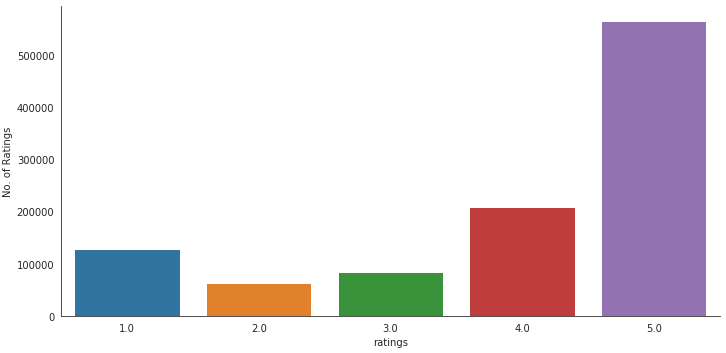

In [293]:
# Ratings distribution
with sns.axes_style('white'):
    g = sns.factorplot("ratings", data=df, aspect=2.0,kind='count')
    g.set_ylabels("No. of Ratings")

In [294]:
df['ratings'].value_counts()

5.0    565637
4.0    208535
1.0    128251
3.0     83509
2.0     62644
Name: ratings, dtype: int64

Majority of the people have given rating 5

In [295]:
#Unique users and products
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df['userId'])))
print("Total No of products  :", len(np.unique(df['productId'])))


Total no of ratings : 1048576
Total No of Users   : 786330
Total No of products  : 61894


In [296]:
#We can drop the timestamp column as we wont be using it in our recommendation models
df.drop(['timestamp'],axis=1,inplace=True)

In [297]:
#Ratings per user
ratings_per_user = df.groupby(by = 'userId')['ratings'].count().sort_values(ascending=False)
ratings_per_user.head()

userId
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
Name: ratings, dtype: int64

In [298]:
ratings_per_user.describe()

count    786330.000000
mean          1.333506
std           1.385612
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         412.000000
Name: ratings, dtype: float64

In [299]:
quantiles = ratings_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

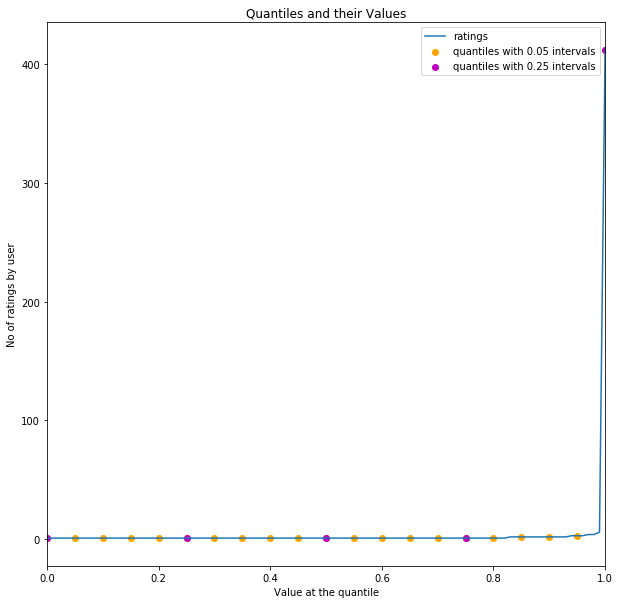

In [300]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [301]:
print('\n No of products with more than 50 users having rated them : {}\n'.format(sum(ratings_per_user >= 50)) )


 No of products with more than 50 users having rated them : 38



### Popularity based recommendation system

In [302]:
#Getting the new dataframe which contains users who has given 50 or more ratings

df_50 = df.groupby("productId").filter(lambda x:x['ratings'].count() >=50)

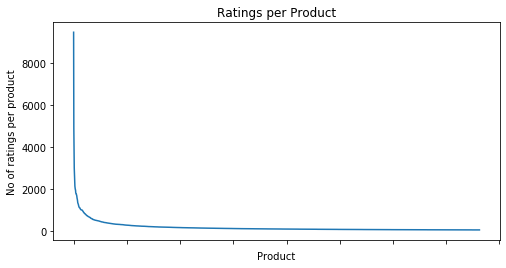

In [303]:
ratings_per_product = df_50.groupby(by='productId')['ratings'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(ratings_per_product.values)
plt.title('Ratings per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [304]:
#Mean rating of different products
df_50.groupby('productId')['ratings'].mean().head()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: ratings, dtype: float64

In [305]:
df_50.groupby('productId')['ratings'].count().sort_values(ascending=False).head()

productId
B0002L5R78    9487
B0001FTVEK    5345
B000I68BD4    4903
B000BQ7GW8    4275
B00007E7JU    3523
Name: ratings, dtype: int64

In [306]:
mean_ratings = pd.DataFrame(df_50.groupby('productId')['ratings'].mean())

In [307]:
mean_ratings['count_of_ratings'] = pd.DataFrame(df_50.groupby('productId')['ratings'].count())

In [308]:
mean_ratings.head()


,ratings,count_of_ratings
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [309]:
mean_ratings['count_of_ratings'].max()


9487

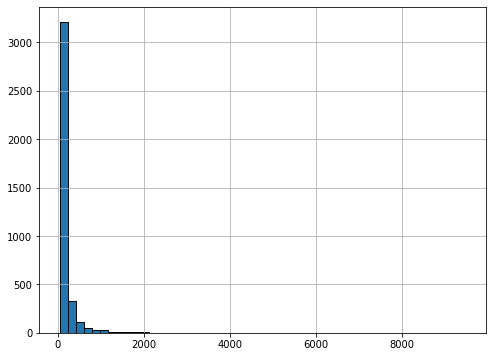

In [310]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
mean_ratings['count_of_ratings'].hist(bins=50)

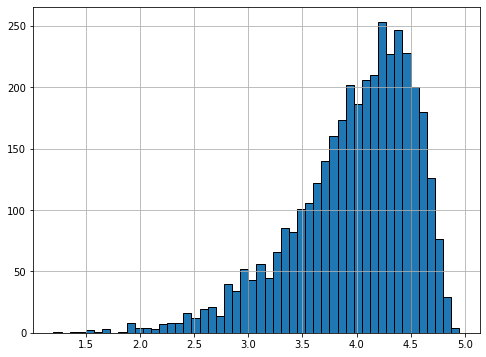

In [311]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
mean_ratings['ratings'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

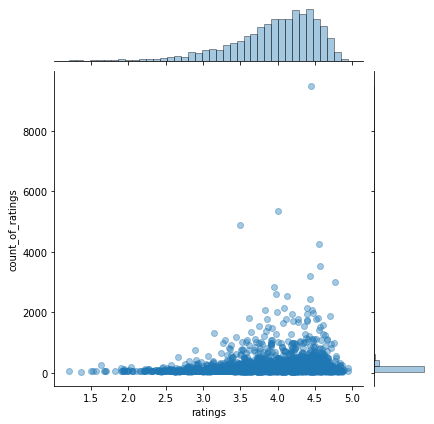

In [312]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='ratings', y='count_of_ratings', data=mean_ratings, alpha=0.4)

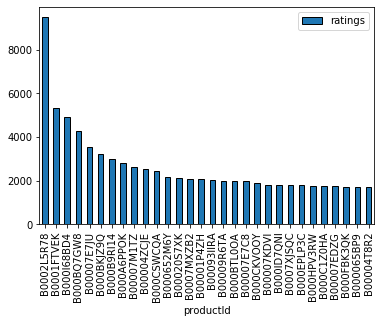

In [313]:
famous_products = pd.DataFrame(df_50.groupby('productId')['ratings'].count())
most_popular = famous_products.sort_values('ratings', ascending=False)
most_popular.head(30).plot(kind = "bar")

### Collaborative filtering based recommendation system

In [314]:
from surprise import KNNWithMeans,accuracy,Dataset,Reader
import os
from surprise.model_selection import train_test_split

In [315]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_50,reader)

In [316]:
#Split data into training and testing set
#train_set, test_set = train_test_split(data, test_size=0.3, random_state=1)
train_set, test_set = train_test_split(data, test_size=0.3, random_state=1)

In [317]:
# User_based on true and false to change between user-based and item-based collaborative filtering
algo = KNNWithMeans(k=5,sim_options={'name':'pearson_baseline','user_based':False})
algo.fit(train_set)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [318]:
#Validate model on the test set
test_pred = algo.test(test_set)
test_pred

[Prediction(uid='AEPK482YTX7UL', iid='B000068CS0', r_ui=5.0, est=4.04954041832258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AM1FWZ76OVLER', iid='B000HS3O2G', r_ui=1.0, est=4.04954041832258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A23LG3G7EBG2HU', iid='B00001P4ZH', r_ui=4.0, est=4.466032608695652, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKBG8GQ380TOL', iid='B000067RVJ', r_ui=3.0, est=4.04954041832258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AKI52RJUE6QOT', iid='B000EUGX70', r_ui=4.0, est=4.04954041832258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A31Y9YNTTGPJNI', iid='B000I13TBS', r_ui=5.0, est=4.04954041832258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2DM55M17M1OWY', iid='B000BHQCP4', r_ui=2.0, e

In [319]:
# Root Mean Square Error
print("Item Item : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item Item : Test Set
RMSE: 1.3415


1.341519802602911

### Model Based Collaborative Filtering

In [320]:
new_df=df_50.head(10000)
ratings_matrix = new_df.pivot_table(values='ratings', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [321]:
M= ratings_matrix.T
M.head()

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [322]:
M.shape

(76, 9832)

In [323]:
M1 = M

In [324]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomp_matrix = SVD.fit_transform(M)
decomp_matrix.shape

(76, 10)

In [325]:
#Correlation Matrix

corr_matrix = np.corrcoef(decomp_matrix)
corr_matrix.shape

(76, 76)

In [326]:
M.index[75]

'B00000K135'

In [327]:
i = "B00000K135"

product_names = list(M.index)
product_ID = product_names.index(i)
product_ID

75

Correlation for all items with the item purchased by this buyer based on items rated by other buyers who bought the same product

In [328]:
corr_prod = corr_matrix[product_ID]
corr_prod.shape

(76,)

In [329]:
rec = list(M.index[corr_prod > 0.65])

# To remove items purchased by the customer already 
rec.remove(i) 

print('Top 5 products displayed by the recommendation system based on the purchase history of the customer:')
rec[0:5]

Top 5 products displayed by the recommendation system based on the purchase history of the customer:


['1400501466', '1400501520', '1400501776', '1400532736', '1400599997']

Insights
- Using user-user based recommender system leads to memory problems, but such a recommendation system tends to have high variance and low bias and is more personalized for users
- Item-item based recommender system will have low variance as there are a lot of buyers would have used a single item and is not personalized for users
- Memory based algorithms tend to recommend very similar products to users without variety
- Since there is no issue of cold start in this dataset we dont need to use content based recommendation system and can use collaborative filtering approach
- Using SVD we can recommend a user the products which have similar ratings  